In [1]:
import re #regular-expression
import pandas as pd
from datetime import datetime 

In [2]:
# Read the file
with open('WhatsApp Chat with CSE-5 official .txt', 'r', encoding='utf-8') as f:
    data = f.read()

In [3]:
# Step 2: Updated pattern to extract date, time (with am/pm), sender, and message
pattern = r'(\d{2}/\d{2}/\d{2}),\s(\d{1,2}:\d{2})\s*[^\x00-\x7F]*([AaPp][Mm])\s-\s([^:]+):\s(.*)'

matches = re.findall(pattern, data)

# Lists to store structured data
dates, times_12hr, senders, messages, times_24hr = [], [], [], [], []

for match in matches:
    date, time_12hr, meridian, sender, message = match

    # Combine time + meridian
    full_12hr_time = f"{time_12hr} {meridian.upper()}"

    # Convert to 24hr format
    time_24hr = datetime.strptime(full_12hr_time, "%I:%M %p").strftime("%H:%M")

    # Append all
    dates.append(datetime.strptime(date, "%d/%m/%y").strftime("%Y-%m-%d"))
    times_12hr.append(full_12hr_time)
    times_24hr.append(time_24hr)
    senders.append(sender.strip())
    messages.append(message.strip())

# Step 3: Create DataFrame
df = pd.DataFrame({
    "Date": dates,
    "Time (AM/PM)": times_12hr,
    "Time (24hr)": times_24hr,
    "Sender": senders,
    "Message": messages
})

df.head()

,Date,Time (AM/PM),Time (24hr),Sender,Message
0,2024-08-06,3:08 PM,15:08,+91 91158 91984,Do we need to take laptop for the lab?
1,2024-08-06,3:29 PM,15:29,+91 74700 00754,"Hey,"
2,2024-08-06,3:39 PM,15:39,+91 98405 86647,there is no programming lab in the tnp dep
3,2024-08-06,3:42 PM,15:42,+91 74700 00754,"cse department, i can also tell what has been ..."
4,2024-08-06,3:42 PM,15:42,+91 99109 15727,Where do we have to go for the next class?


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Year']

0        2024
1        2024
2        2024
3        2024
4        2024
         ... 
18100    2025
18101    2025
18102    2025
18103    2025
18104    2025
Name: Year, Length: 18105, dtype: int32

In [5]:
df.head() #() lgane se proper table format mein aa jata ha

,Date,Time (AM/PM),Time (24hr),Sender,Message,Year
0,2024-08-06,3:08 PM,15:08,+91 91158 91984,Do we need to take laptop for the lab?,2024
1,2024-08-06,3:29 PM,15:29,+91 74700 00754,"Hey,",2024
2,2024-08-06,3:39 PM,15:39,+91 98405 86647,there is no programming lab in the tnp dep,2024
3,2024-08-06,3:42 PM,15:42,+91 74700 00754,"cse department, i can also tell what has been ...",2024
4,2024-08-06,3:42 PM,15:42,+91 99109 15727,Where do we have to go for the next class?,2024


In [6]:
df['Month']=df['Date'].dt.month_name()
df['Month']

0        August
1        August
2        August
3        August
4        August
          ...  
18100     April
18101     April
18102     April
18103     April
18104     April
Name: Month, Length: 18105, dtype: object

In [7]:
df.head()

,Date,Time (AM/PM),Time (24hr),Sender,Message,Year,Month
0,2024-08-06,3:08 PM,15:08,+91 91158 91984,Do we need to take laptop for the lab?,2024,August
1,2024-08-06,3:29 PM,15:29,+91 74700 00754,"Hey,",2024,August
2,2024-08-06,3:39 PM,15:39,+91 98405 86647,there is no programming lab in the tnp dep,2024,August
3,2024-08-06,3:42 PM,15:42,+91 74700 00754,"cse department, i can also tell what has been ...",2024,August
4,2024-08-06,3:42 PM,15:42,+91 99109 15727,Where do we have to go for the next class?,2024,August


In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day']=df['Date'].dt.day # bracket is used for finding name
df['Day']
df['Time (24hr)'] = pd.to_datetime(df['Time (24hr)'], format='%H:%M')
df['Hour'] = df['Time (24hr)'].dt.hour
df['Minute'] = df['Time (24hr)'].dt.minute

In [9]:
df.head()

,Date,Time (AM/PM),Time (24hr),Sender,Message,Year,Month,Day,Hour,Minute
0,2024-08-06,3:08 PM,1900-01-01 15:08:00,+91 91158 91984,Do we need to take laptop for the lab?,2024,August,6,15,8
1,2024-08-06,3:29 PM,1900-01-01 15:29:00,+91 74700 00754,"Hey,",2024,August,6,15,29
2,2024-08-06,3:39 PM,1900-01-01 15:39:00,+91 98405 86647,there is no programming lab in the tnp dep,2024,August,6,15,39
3,2024-08-06,3:42 PM,1900-01-01 15:42:00,+91 74700 00754,"cse department, i can also tell what has been ...",2024,August,6,15,42
4,2024-08-06,3:42 PM,1900-01-01 15:42:00,+91 99109 15727,Where do we have to go for the next class?,2024,August,6,15,42


In [10]:
df[df['Sender'] == 'Ravi Kumar Srivastava'].shape[0]

229

In [11]:
print(df.columns)

Index(['Date', 'Time (AM/PM)', 'Time (24hr)', 'Sender', 'Message', 'Year',
       'Month', 'Day', 'Hour', 'Minute'],
      dtype='object')


In [12]:
words=[]
for message in df['Message']:
    words.extend(message.split())
len(words)

102206

In [13]:
import sys
!"{sys.executable}" -m pip install urlextract

In [14]:
from urlextract import URLExtract
extractor=URLExtract()
urls=extractor.find_urls("wwww.google.com haveiof stackoverflow.com ybwsos isthe youtube.com kk ej@gmail.com")
urls

['wwww.google.com', 'stackoverflow.com', 'youtube.com']

In [15]:
links=[]
for message in df['Message']:
    links.extend(extractor.find_urls(message))

links
len(links)

136

In [16]:
df.columns = df.columns.str.strip()
x=df['Sender'].value_counts().head()

In [17]:
import matplotlib.pyplot as plt 

In [18]:
name= x.index
count = x.values

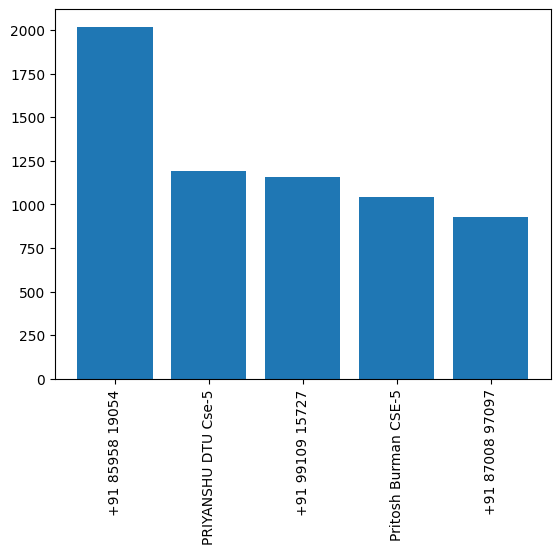

In [19]:
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [20]:
new_df= round(df['Sender'].value_counts()/df.shape[0] *100,2).reset_index().rename(columns={'count':'Percentage'})
new_df

,Sender,Percentage
0,+91 85958 19054,11.15
1,PRIYANSHU DTU Cse-5,6.59
2,+91 99109 15727,6.37
3,Pritosh Burman CSE-5,5.77
4,+91 87008 97097,5.14
...,...,...
77,+91 70421 18614,0.01
78,+91 98216 92710,0.01
79,+91 79824 46852,0.01
80,+91 76786 27502,0.01


In [21]:
words=[]
for message in df['Message']:
    words.extend(message.split())
words

['Do',
 'we',
 'need',
 'to',
 'take',
 'laptop',
 'for',
 'the',
 'lab?',
 'Hey,',
 'there',
 'is',
 'no',
 'programming',
 'lab',
 'in',
 'the',
 'tnp',
 'dep',
 'cse',
 'department,',
 'i',
 'can',
 'also',
 'tell',
 'what',
 'has',
 'been',
 'given',
 'in',
 'the',
 'timetable',
 'as',
 'of',
 'now',
 'Where',
 'do',
 'we',
 'have',
 'to',
 'go',
 'for',
 'the',
 'next',
 'class?',
 'Ghar',
 'programming',
 'lab',
 'location',
 'bhej',
 'dena',
 'phuchke',
 ':)',
 '<This',
 'message',
 'was',
 'edited>',
 '+1',
 'Class',
 'hogi',
 'kya',
 'aaj?',
 'Kha',
 'aana',
 'h',
 'bhai',
 'Cr',
 'kha',
 'aana',
 'h',
 '?',
 'programming',
 'lab',
 'But',
 'wo',
 'hai',
 'kahan',
 '?',
 'guys',
 'please',
 'give',
 'me',
 '5',
 'minutes',
 'No',
 'aap',
 'kahan',
 'ho',
 'devi',
 'GUYS',
 'i',
 'just',
 'confirmed',
 'from',
 'the',
 'seniors',
 'the',
 'lab',
 'is',
 'either',
 'in',
 'the',
 'twin',
 'towers',
 'or',
 'there',
 'wont',
 'be',
 'any',
 'lab',
 'today',
 'aapke',
 'liye',
 'd

In [22]:
df=df.copy()
df = df[df['Message'] != '<Media omitted>'].copy()
df['Message']

0                   Do we need to take laptop for the lab?
1                                                     Hey,
2               there is no programming lab in the tnp dep
3        cse department, i can also tell what has been ...
4               Where do we have to go for the next class?
                               ...                        
18100                                               15 min
18101    About 10 mins se padha rahe hai <This message ...
18102              IMG-20250402-WA0005.jpg (file attached)
18103    Inclass Quiz 8 link: https://docs.google.com/f...
18104                                 Phy ki class ha kya?
Name: Message, Length: 17048, dtype: object

In [23]:
df = df[df['Message'] != 'This message was deleted']
df

,Date,Time (AM/PM),Time (24hr),Sender,Message,Year,Month,Day,Hour,Minute
0,2024-08-06,3:08 PM,1900-01-01 15:08:00,+91 91158 91984,Do we need to take laptop for the lab?,2024,August,6,15,8
1,2024-08-06,3:29 PM,1900-01-01 15:29:00,+91 74700 00754,"Hey,",2024,August,6,15,29
2,2024-08-06,3:39 PM,1900-01-01 15:39:00,+91 98405 86647,there is no programming lab in the tnp dep,2024,August,6,15,39
3,2024-08-06,3:42 PM,1900-01-01 15:42:00,+91 74700 00754,"cse department, i can also tell what has been ...",2024,August,6,15,42
4,2024-08-06,3:42 PM,1900-01-01 15:42:00,+91 99109 15727,Where do we have to go for the next class?,2024,August,6,15,42
...,...,...,...,...,...,...,...,...,...,...
18100,2025-04-02,10:21 AM,1900-01-01 10:21:00,Nitin Negi DTU CSE Cse 5,15 min,2025,April,2,10,21
18101,2025-04-02,10:21 AM,1900-01-01 10:21:00,Priyanshu Barik CSE-5,About 10 mins se padha rahe hai <This message ...,2025,April,2,10,21
18102,2025-04-02,11:20 AM,1900-01-01 11:20:00,+91 98405 86647,IMG-20250402-WA0005.jpg (file attached),2025,April,2,11,20
18103,2025-04-02,11:45 AM,1900-01-01 11:45:00,+91 74700 00754,Inclass Quiz 8 link: https://docs.google.com/f...,2025,April,2,11,45


In [24]:
df = df[df['Message'] != 'POLL:']
df

,Date,Time (AM/PM),Time (24hr),Sender,Message,Year,Month,Day,Hour,Minute
0,2024-08-06,3:08 PM,1900-01-01 15:08:00,+91 91158 91984,Do we need to take laptop for the lab?,2024,August,6,15,8
1,2024-08-06,3:29 PM,1900-01-01 15:29:00,+91 74700 00754,"Hey,",2024,August,6,15,29
2,2024-08-06,3:39 PM,1900-01-01 15:39:00,+91 98405 86647,there is no programming lab in the tnp dep,2024,August,6,15,39
3,2024-08-06,3:42 PM,1900-01-01 15:42:00,+91 74700 00754,"cse department, i can also tell what has been ...",2024,August,6,15,42
4,2024-08-06,3:42 PM,1900-01-01 15:42:00,+91 99109 15727,Where do we have to go for the next class?,2024,August,6,15,42
...,...,...,...,...,...,...,...,...,...,...
18100,2025-04-02,10:21 AM,1900-01-01 10:21:00,Nitin Negi DTU CSE Cse 5,15 min,2025,April,2,10,21
18101,2025-04-02,10:21 AM,1900-01-01 10:21:00,Priyanshu Barik CSE-5,About 10 mins se padha rahe hai <This message ...,2025,April,2,10,21
18102,2025-04-02,11:20 AM,1900-01-01 11:20:00,+91 98405 86647,IMG-20250402-WA0005.jpg (file attached),2025,April,2,11,20
18103,2025-04-02,11:45 AM,1900-01-01 11:45:00,+91 74700 00754,Inclass Quiz 8 link: https://docs.google.com/f...,2025,April,2,11,45


In [25]:
df = df[df['Message'] != '.']
df

,Date,Time (AM/PM),Time (24hr),Sender,Message,Year,Month,Day,Hour,Minute
0,2024-08-06,3:08 PM,1900-01-01 15:08:00,+91 91158 91984,Do we need to take laptop for the lab?,2024,August,6,15,8
1,2024-08-06,3:29 PM,1900-01-01 15:29:00,+91 74700 00754,"Hey,",2024,August,6,15,29
2,2024-08-06,3:39 PM,1900-01-01 15:39:00,+91 98405 86647,there is no programming lab in the tnp dep,2024,August,6,15,39
3,2024-08-06,3:42 PM,1900-01-01 15:42:00,+91 74700 00754,"cse department, i can also tell what has been ...",2024,August,6,15,42
4,2024-08-06,3:42 PM,1900-01-01 15:42:00,+91 99109 15727,Where do we have to go for the next class?,2024,August,6,15,42
...,...,...,...,...,...,...,...,...,...,...
18100,2025-04-02,10:21 AM,1900-01-01 10:21:00,Nitin Negi DTU CSE Cse 5,15 min,2025,April,2,10,21
18101,2025-04-02,10:21 AM,1900-01-01 10:21:00,Priyanshu Barik CSE-5,About 10 mins se padha rahe hai <This message ...,2025,April,2,10,21
18102,2025-04-02,11:20 AM,1900-01-01 11:20:00,+91 98405 86647,IMG-20250402-WA0005.jpg (file attached),2025,April,2,11,20
18103,2025-04-02,11:45 AM,1900-01-01 11:45:00,+91 74700 00754,Inclass Quiz 8 link: https://docs.google.com/f...,2025,April,2,11,45


In [26]:
f=open('stop_hinglish.txt','r')
stop_words=f.read()
print(stop_words)

.
..
...
?
??
,
edited>
<this
message
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mo

In [27]:
for message in df['Message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)
words

['Do',
 'we',
 'need',
 'to',
 'take',
 'laptop',
 'for',
 'the',
 'lab?',
 'Hey,',
 'there',
 'is',
 'no',
 'programming',
 'lab',
 'in',
 'the',
 'tnp',
 'dep',
 'cse',
 'department,',
 'i',
 'can',
 'also',
 'tell',
 'what',
 'has',
 'been',
 'given',
 'in',
 'the',
 'timetable',
 'as',
 'of',
 'now',
 'Where',
 'do',
 'we',
 'have',
 'to',
 'go',
 'for',
 'the',
 'next',
 'class?',
 'Ghar',
 'programming',
 'lab',
 'location',
 'bhej',
 'dena',
 'phuchke',
 ':)',
 '<This',
 'message',
 'was',
 'edited>',
 '+1',
 'Class',
 'hogi',
 'kya',
 'aaj?',
 'Kha',
 'aana',
 'h',
 'bhai',
 'Cr',
 'kha',
 'aana',
 'h',
 '?',
 'programming',
 'lab',
 'But',
 'wo',
 'hai',
 'kahan',
 '?',
 'guys',
 'please',
 'give',
 'me',
 '5',
 'minutes',
 'No',
 'aap',
 'kahan',
 'ho',
 'devi',
 'GUYS',
 'i',
 'just',
 'confirmed',
 'from',
 'the',
 'seniors',
 'the',
 'lab',
 'is',
 'either',
 'in',
 'the',
 'twin',
 'towers',
 'or',
 'there',
 'wont',
 'be',
 'any',
 'lab',
 'today',
 'aapke',
 'liye',
 'd

In [28]:
from collections import Counter
common_words = Counter(words).most_common(20)

# Convert to DataFrame
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Display the DataFrame
print(df_common_words)

        Word  Frequency
0        hai       2505
1    message       1538
2        was       1527
3         to       1497
4      class       1461
5          h       1176
6    deleted       1097
7     <Media       1057
8   omitted>       1057
9       This       1055
10       nhi        945
11       bhi        861
12        ki        856
13        ka        810
14       the        736
15        hi        722
16      bhai        695
17        me        683
18         ?        669
19       lab        668


In [29]:
import sys
!"{sys.executable}" -m pip install emoji
import emoji

In [30]:
import emoji
print(emoji.__version__)

2.14.1


In [31]:
import emoji

emojis = []

for message in df['Message']:
    for char in message:
        if emoji.is_emoji(char):
            emojis.append(char)
emojis

['🥲',
 '🗿',
 '😂',
 '🥲',
 '😂',
 '💀',
 '🥲',
 '🥲',
 '💀',
 '🙂',
 '💀',
 '😂',
 '🗿',
 '🤣',
 '😂',
 '😂',
 '😂',
 '🗿',
 '🤣',
 '💀',
 '🙂',
 '🥲',
 '😉',
 '😂',
 '😂',
 '😂',
 '🥲',
 '😂',
 '😂',
 '😂',
 '💪',
 '🏻',
 '🗿',
 '😂',
 '💀',
 '😭',
 '😂',
 '😔',
 '😂',
 '😂',
 '😂',
 '😂',
 '🤓',
 '🤣',
 '🤣',
 '🤣',
 '👍',
 '😔',
 '😑',
 '😀',
 '🗿',
 '🗿',
 '🗿',
 '👍',
 '😮',
 '💨',
 '🗿',
 '🗿',
 '🙃',
 '👏',
 '🏻',
 '♾',
 '🤣',
 '☺',
 '🫠',
 '😔',
 '😔',
 '😜',
 '🤣',
 '👍',
 '🏻',
 '♾',
 '🥶',
 '😂',
 '🤣',
 '🤣',
 '🙂',
 '😐',
 '😐',
 '😐',
 '🤣',
 '😔',
 '🤣',
 '👍',
 '🏻',
 '🫡',
 '🫡',
 '👍',
 '🏻',
 '😅',
 '😅',
 '🤣',
 '😂',
 '🤦',
 '🏻',
 '🙂',
 '👍',
 '🫡',
 '😂',
 '😭',
 '🗿',
 '🙏',
 '🙏',
 '🙂',
 '🗿',
 '🤣',
 '🗿',
 '💀',
 '🗿',
 '🙂',
 '🗿',
 '🙂',
 '🥲',
 '🙏',
 '👌',
 '😅',
 '✌',
 '😭',
 '😂',
 '💀',
 '💀',
 '🤣',
 '🤣',
 '🤣',
 '🥂',
 '🍾',
 '🍾',
 '🤔',
 '👍',
 '🏼',
 '🥺',
 '🤯',
 '😭',
 '👍',
 '🏻',
 '🫠',
 '🥲',
 '🗿',
 '👍',
 '🏻',
 '😭',
 '🥲',
 '🥰',
 '😋',
 '🥲',
 '🤌',
 '🙏',
 '💀',
 '💀',
 '🗿',
 '👽',
 '👾',
 '😶',
 '✋',
 '😂',
 '🧢',
 '🔥',
 '😂',
 '😂',
 '😂',
 '😞',
 '😂',
 '😂',
 '😜',
 '😂',
 '🤡',
 '😂'

In [32]:
from collections import Counter

emoji_counts = Counter(emojis)
emoji_df = pd.DataFrame(emoji_counts.most_common(10), columns=['Emoji', 'Count'])
emoji_df

,Emoji,Count
0,😭,461
1,😂,420
2,🤣,252
3,🙏,184
4,💀,160
5,🥲,122
6,👍,110
7,🏻,90
8,🙂,54
9,🗿,45


In [33]:
df.loc[:, 'Month_num'] = df['Date'].dt.month
df

C:\Users\Ravi Kumar\AppData\Local\Temp\ipykernel_9612\451705132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Month_num'] = df['Date'].dt.month


,Date,Time (AM/PM),Time (24hr),Sender,Message,Year,Month,Day,Hour,Minute,Month_num
0,2024-08-06,3:08 PM,1900-01-01 15:08:00,+91 91158 91984,Do we need to take laptop for the lab?,2024,August,6,15,8,8
1,2024-08-06,3:29 PM,1900-01-01 15:29:00,+91 74700 00754,"Hey,",2024,August,6,15,29,8
2,2024-08-06,3:39 PM,1900-01-01 15:39:00,+91 98405 86647,there is no programming lab in the tnp dep,2024,August,6,15,39,8
3,2024-08-06,3:42 PM,1900-01-01 15:42:00,+91 74700 00754,"cse department, i can also tell what has been ...",2024,August,6,15,42,8
4,2024-08-06,3:42 PM,1900-01-01 15:42:00,+91 99109 15727,Where do we have to go for the next class?,2024,August,6,15,42,8
...,...,...,...,...,...,...,...,...,...,...,...
18100,2025-04-02,10:21 AM,1900-01-01 10:21:00,Nitin Negi DTU CSE Cse 5,15 min,2025,April,2,10,21,4
18101,2025-04-02,10:21 AM,1900-01-01 10:21:00,Priyanshu Barik CSE-5,About 10 mins se padha rahe hai <This message ...,2025,April,2,10,21,4
18102,2025-04-02,11:20 AM,1900-01-01 11:20:00,+91 98405 86647,IMG-20250402-WA0005.jpg (file attached),2025,April,2,11,20,4
18103,2025-04-02,11:45 AM,1900-01-01 11:45:00,+91 74700 00754,Inclass Quiz 8 link: https://docs.google.com/f...,2025,April,2,11,45,4


In [34]:
timeline = df.groupby(['Year', 'Month_num', 'Month']).count()['Message'].reset_index()
timeline

,Year,Month_num,Month,Message
0,2024,8,August,2386
1,2024,9,September,4921
2,2024,10,October,2601
3,2024,11,November,3063
4,2024,12,December,302
5,2025,1,January,504
6,2025,2,February,838
7,2025,3,March,1006
8,2025,4,April,124


In [35]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['Month'][i] + "-" + str(timeline['Year'][i]))

In [36]:
timeline['time']= time

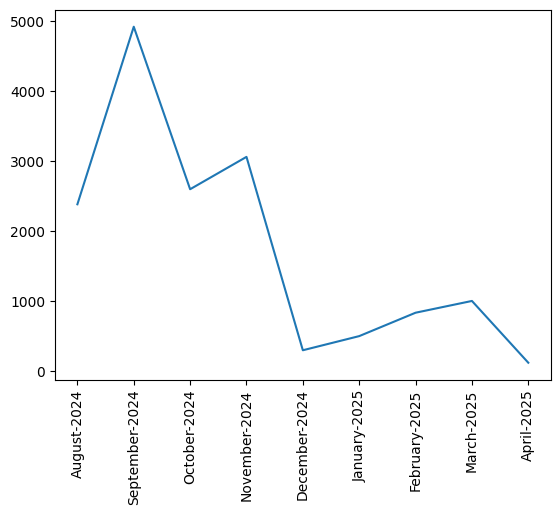

In [37]:
plt.plot(timeline['time'], timeline['Message'])
plt.xticks(rotation='vertical')
plt.show()

In [38]:
df.loc[:,'only_date']=df['Date'].dt.date

C:\Users\Ravi Kumar\AppData\Local\Temp\ipykernel_9612\4076203161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'only_date']=df['Date'].dt.date


In [39]:
daily_timeline=df.groupby('only_date').count()['Message'].reset_index()

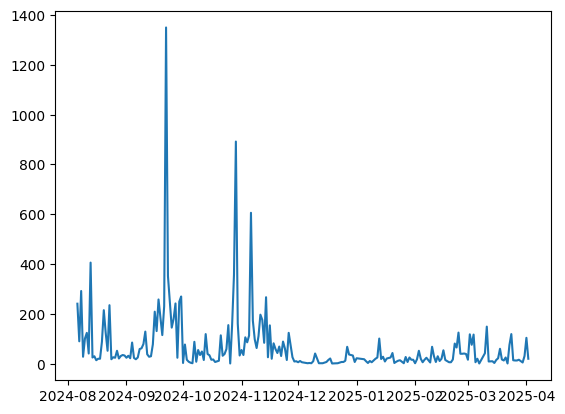

In [40]:
plt.plot(daily_timeline['only_date'],daily_timeline['Message'])
plt.show()

In [41]:
df.loc[:,'DayName']= df['Date'].dt.day_name()

C:\Users\Ravi Kumar\AppData\Local\Temp\ipykernel_9612\380867025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'DayName']= df['Date'].dt.day_name()


In [42]:
df['DayName'].value_counts()

DayName
Tuesday      3475
Sunday       2950
Monday       2848
Wednesday    2279
Thursday     1725
Friday       1430
Saturday     1038
Name: count, dtype: int64

In [43]:
df['Month'].value_counts()

Month
September    4921
November     3063
October      2601
August       2386
March        1006
February      838
January       504
December      302
April         124
Name: count, dtype: int64

In [44]:
period = []
for hour in df[['DayName', 'Hour']]['Hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour + 1))
    else:
        period.append(str(hour) + "-" + str(hour + 1))


In [45]:
df = df.copy()  # explicitly make it a full independent copy
df.loc[:, 'Period'] = period

In [46]:
df['Period']

0        15-16
1        15-16
2        15-16
3        15-16
4        15-16
         ...  
18100    10-11
18101    10-11
18102    11-12
18103    11-12
18104    12-13
Name: Period, Length: 15745, dtype: object

In [47]:
print(df.columns)


Index(['Date', 'Time (AM/PM)', 'Time (24hr)', 'Sender', 'Message', 'Year',
       'Month', 'Day', 'Hour', 'Minute', 'Month_num', 'only_date', 'DayName',
       'Period'],
      dtype='object')


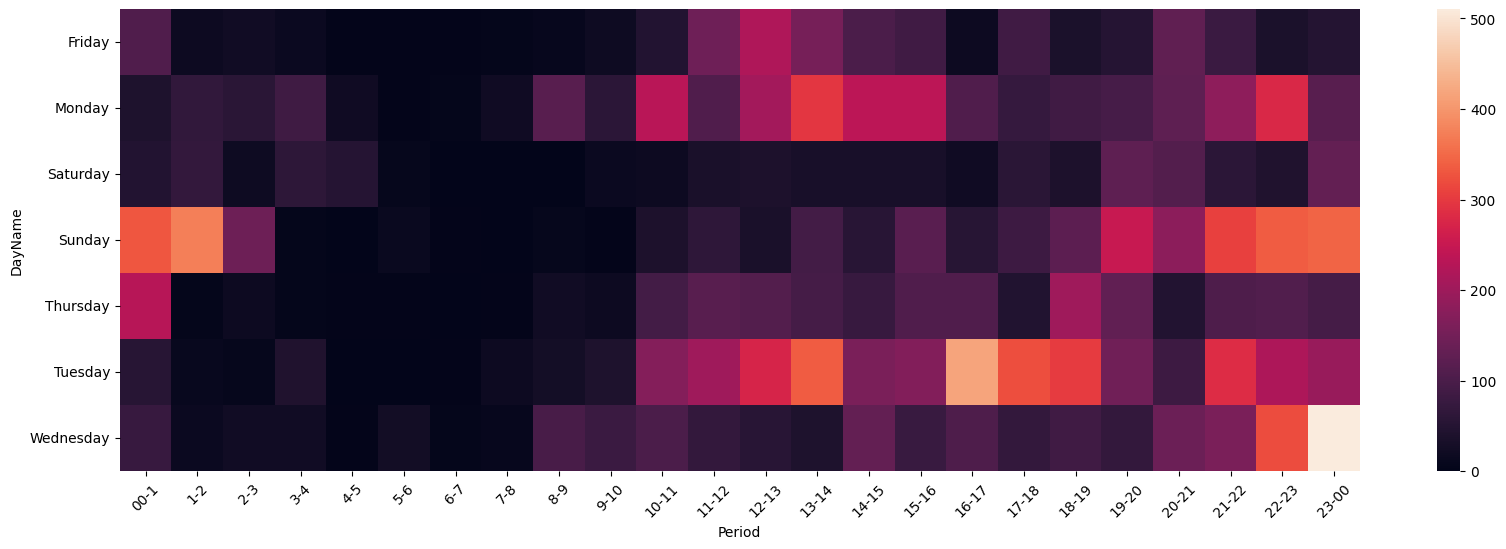

In [48]:
import seaborn as sns
# Define the correct order of periods
period_order = [
    "00-1", "1-2", "2-3", "3-4", "4-5", "5-6", "6-7", "7-8", "8-9", "9-10",
    "10-11", "11-12", "12-13", "13-14", "14-15", "15-16", "16-17", "17-18", "18-19", "19-20",
    "20-21", "21-22", "22-23", "23-00"
]

# Create pivot table and reindex columns in desired order
pivot_table = df.pivot_table(index='DayName', columns='Period', values='Message', aggfunc='count').fillna(0)

# Reorder columns
existing_periods = [period for period in period_order if period in pivot_table.columns]
pivot_table = pivot_table[existing_periods]
#print(df['Period'].unique())
# Plot heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(pivot_table)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


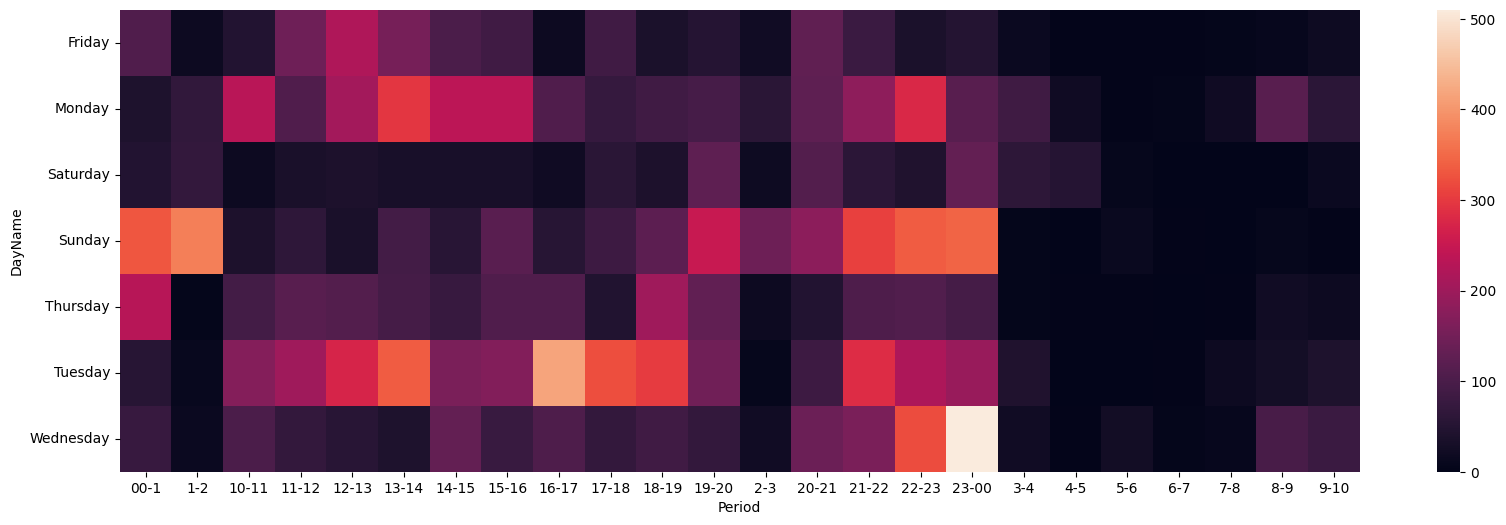

In [49]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='DayName', columns='Period', values='Message', aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()

In [50]:
df['pivotTable'] = df.pivot_table(index='DayName', columns='Period', values='Message', aggfunc='count').fillna(0)                                                                                            

ValueError: Cannot set a DataFrame with multiple columns to the single column pivotTable

In [ ]:
!pip install scikit-learn

In [ ]:
import sklearn
print(sklearn.__version__)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd

# ✅ Example features
# X should include all relevant features you want to use
# Assume your DataFrame looks like this:
# Columns: ['Message_Length', 'Emoji_Count', 'Hour', 'Link_Count', 'Media_Count', 'DayName']

categorical_features = ['DayName']   # Or add 'Sender' if you use it
numerical_features = ['Message_Length', 'Emoji_Count', 'Hour', 'Link_Count', 'Media_Count']

# ✅ Create ColumnTransformer for both encoding and scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [ ]:
import re
import emoji
# ✅ Create new features
df['Message_Length'] = df['Message'].apply(lambda x: len(str(x)))

df['Emoji_Count'] = df['Message'].apply(lambda x: len([c for c in str(x) if emoji.is_emoji(c)]))

df['Link_Count'] = df['Message'].apply(lambda x: len(re.findall(r"http[s]?://\S+", str(x))))
df['Media_Count'] = df['Message'].apply(lambda x: 1 if '<Media omitted>' in str(x) else 0)

# ✅ Create target (e.g. highly active if more than 50 messages per day)
activity_per_sender = df.groupby('Sender')['Message'].count()
highly_active_senders = activity_per_sender[activity_per_sender > 50].index
df['is_active'] = df['Sender'].apply(lambda x: 1 if x in highly_active_senders else 0)


In [ ]:
print(df.columns)


In [ ]:
# These are your input features
numerical_features = ['Message_Length', 'Emoji_Count', 'Hour', 'Link_Count', 'Media_Count']
categorical_features = ['DayName']  # Only one categorical column

# Target
target = 'is_active'


In [ ]:
X = df[numerical_features + categorical_features]
y = df[target]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


In [ ]:
import pandas as pd
import re
import emoji 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
from collections import Counter
from urlextract import URLExtract

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
# Logistic Regression
logistic_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# KNN
knn_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree
tree_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

models = {
    'Logistic Regression': logistic_model,
    'KNN': knn_model,
    'Decision Tree': tree_model
}

for name, model in models.items():
    print(f"\n🔍 Model: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred)*100)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))


In [ ]:
# Checking for Missing Values
print(f"\n🔍 Checking for Missing Values:")
print(df.isnull().sum())
# Checking for Duplicate Rows
print(f"\n🔍 Checking for Duplicate Rows:")
duplicates=df.duplicated()
print(duplicates.sum())

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

def plot_cm(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
    disp.ax_.set_title(title)
    plt.show()

plot_cm(logistic_model, X_test, y_test, "Logistic Regression")
plot_cm(knn_model, X_test, y_test, "KNN")
plot_cm(tree_model, X_test, y_test, "Decision Tree")


In [ ]:
def evaluate_model(name, model, X_train, X_test, y_train, y_test, results_list):
    print(f"\n📊 Evaluation for: {name}")

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Train Metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    print("\n✅ Train Classification Report:")
    print(classification_report(y_train, y_train_pred, zero_division=0))
    print("🧮 Train Confusion Matrix:")
    print(confusion_matrix(y_train, y_train_pred))

    # Test Metrics
    test_acc = accuracy_score(y_test, y_test_pred)
    print("\n✅ Test Classification Report:")
    print(classification_report(y_test, y_test_pred, zero_division=0))
    print("🧮 Test Confusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred))

    # Save results
    results_list.append({
        'Model': name,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc
    })


In [ ]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    evaluate_model(name + " (Non-Tuned)", model, X_train, X_test, y_train, y_test, results)


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.01, 0.1, 1, 10]
    },
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7, 9]
    },
    'Decision Tree': {
        'classifier__max_depth': [3, 5, 10, None]
    }
}


In [ ]:
for name, model in models.items():
    print(f"\n🔧 Tuning: {name}")
    grid = GridSearchCV(model, param_grids[name], cv=3)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    print("Best Params:", grid.best_params_)

    evaluate_model(name + " (Tuned)", best_model, X_train, X_test, y_train, y_test, results)


In [ ]:
import numpy as np
results_df = pd.DataFrame(results)

# Bar plot
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(results_df))

plt.bar(index, results_df['Train Accuracy'], bar_width, label='Train Accuracy')
plt.bar(index + bar_width, results_df['Test Accuracy'], bar_width, label='Test Accuracy')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy (Tuned & Non-Tuned Models)')
plt.xticks(index + bar_width / 2, results_df['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [ ]:
results_df.to_csv("model_evaluation_results.csv", index=False)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define parameter grid for logistic regression tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],    # Regularization strength
    'penalty': ['l2'],              # Only 'l2' is compatible with 'lbfgs'
    'solver': ['lbfgs']             # Optimizer used
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)

# Train model
grid_search.fit(X_train, y_train)

# Get the best estimator
lr_tuned = grid_search.best_estimator_


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_conf_matrix(model, X_train, X_test, y_train, y_test, model_name):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Train Confusion Matrix
    train_preds = model.predict(X_train)
    ConfusionMatrixDisplay.from_predictions(y_train, train_preds, ax=axes[0], cmap='OrRd')
    axes[0].set_title(f'{model_name} - Train Confusion Matrix')

    # Test Confusion Matrix
    test_preds = model.predict(X_test)
    ConfusionMatrixDisplay.from_predictions(y_test, test_preds, ax=axes[1], cmap='OrRd')
    axes[1].set_title(f'{model_name} - Test Confusion Matrix')

    plt.tight_layout()
    plt.show()


In [ ]:
# Example: for your tuned models
plot_conf_matrix(lr_tuned, X_train, X_test, y_train, y_test, "Logistic Regression (Tuned)")
plot_conf_matrix(knn_tuned, X_train, X_test, y_train, y_test, "KNN (Tuned)")
plot_conf_matrix(dt_tuned, X_train, X_test, y_train, y_test, "Decision Tree (Tuned)")
